In [1]:
from newspaper import Article
import json

import nltk
# nltk.download() # did that once, crushed on laptop -> tkinter problem I guess
from nltk.stem import WordNetLemmatizer

# prepare data for ML task

In [2]:
# started with: from https://likegeeks.com/nlp-tutorial-using-python-nltk/
from nltk.tokenize import RegexpTokenizer

from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet') # I have to tell it the language somewhere ...
# german lemmatizing not supported!

from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('german')
stopwords.words('english')

import matplotlib


def preprocess_01 (lang = 'english' , text="Somewhere over the rainbow"):

    words = nltk.word_tokenize(text)

    #tokens=[word.lower() for word in words if word.isalpha()]
    tokens=[word for word in words if word.isalpha()]

    ##### do this only for english ####
    if (lang=='english'):
        lemmatizer = WordNetLemmatizer() 
        tokens=list(map(lemmatizer.lemmatize, tokens))
        #print(tokens)
    
    clean_tokens = tokens[:]
    #print("clean tokens: " , clean_tokens)
    ## expects 'german' for German, 'english' for English
    # sounds obvious? could have been 'de' and 'en'!
    st_w = stopwords.words(lang)
    #print("apply stop words:" , st_w)

    for token in tokens:
        if token in st_w:
            clean_tokens.remove(token)

    freq = nltk.FreqDist(clean_tokens)

    return(freq)


[nltk_data] Downloading package wordnet to /Users/silke/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/silke/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# most word counts are =1 , it will be tough to work with that in clustering
[i for i in freq.values() if i>0]

NameError: name 'freq' is not defined

In [ ]:
## checking out the lemmatizing in english

In [127]:
print(lemmatizer.lemmatize("rocks")) # works
print(lemmatizer.lemmatize("runs")) # works
print(lemmatizer.lemmatize("pops")) # works
print(lemmatizer.lemmatize("pouring")) # not what I expected 
#print(lemmatizer.lemmatize(vector("pops", "runs"))) # not vectorized
list(map(lemmatizer.lemmatize, ["runs","pops"])) # vectorized, works

rock
run
pop
pouring


['run', 'pop']

take the text files from a directory


# create a vocabulary from all articles in a directory

In [6]:
import os
import glob
import pandas as pd

#print(glob.glob("tagesspiegel-2020-07-07/*.txt")[0:10])
# take 10 files with article text
file_list = glob.glob("../tagesspiegel-2020-07-07/*.txt")
# open the files in the file list,

n = len(file_list)
print(n , "files to work with.")

# initialising with the first file / article 
with open (file_list[1]) as file:
    text=file.read()
    print(file_list[1][-9:-4], text[0:20])
    freq_dist=preprocess_01('german',text.lower())
    X=pd.DataFrame(freq_dist.items(), columns=['word',str(file_list[1][-9:-4])])
# looping over the remaining files / articles
for i in range(2,n):
    with open (file_list[i]) as file:
        text=file.read()
        print(file_list[i] , text[0:20] , len(text))
        freq_dist=preprocess_01('german',text.lower())
        # how many words have a count of 2 or higher?
        new_wc=pd.DataFrame(freq_dist.items(), columns=['word',file_list[i][-9:-4]])
        X=pd.merge(X,new_wc, on="word",how="outer")

# the vocabulary: take all words in X and sum row wise
X['vocab']=X.sum(axis=1)

#file_name='tagesspiegel-2020-07-07/00001.txt'
#print(os.getcwd())
#(_, _, filenames) = next(os.walk("tagesspiegel-2020-07-07"))
#(_, _, filenames) = next(os.walk(os.getcwd()))
# print(filenames==".txt") # not ok
#go_through_file_names='tagesspiegel-2020-07-07/'

155 files to work with.
00030 Hinter dem Ferrari-M
../tagesspiegel-2020-07-07/00024.txt Als Cisgender werden 2416
../tagesspiegel-2020-07-07/00144.txt Die von der Bundesre 2405
../tagesspiegel-2020-07-07/00150.txt Zwei Erdbeben haben  3075
../tagesspiegel-2020-07-07/00151.txt Geplant war es folge 4650
../tagesspiegel-2020-07-07/00145.txt Unter Ärzten und Koa 5128
../tagesspiegel-2020-07-07/00025.txt Die Reproduktionszah 2193
../tagesspiegel-2020-07-07/00031.txt Er saß in der S-Bahn 6487
../tagesspiegel-2020-07-07/00019.txt "Hier sieht man mal, 523
../tagesspiegel-2020-07-07/00027.txt Pointen hinter Gitte 243
../tagesspiegel-2020-07-07/00033.txt Ein spanischer Stadt 1176
../tagesspiegel-2020-07-07/00153.txt Etwa 100 evangelisch 2023
../tagesspiegel-2020-07-07/00147.txt Wer einen Überblick  11763
../tagesspiegel-2020-07-07/00146.txt Sich vom Flughafen T 4397
../tagesspiegel-2020-07-07/00152.txt Die Reproduktionszah 2193
../tagesspiegel-2020-07-07/00032.txt Es ist ein Misstraue 10284
../t

../tagesspiegel-2020-07-07/00076.txt Großes Ja mit kleine 4785
../tagesspiegel-2020-07-07/00039.txt Die Bundesregierung  2638
../tagesspiegel-2020-07-07/00011.txt Sebastian Kunze hat  441
../tagesspiegel-2020-07-07/00005.txt Frau Piel, Sie sind  7789
../tagesspiegel-2020-07-07/00004.txt Plötzlich prescht de 12653
../tagesspiegel-2020-07-07/00010.txt Heute um sieben Uhr  8294
../tagesspiegel-2020-07-07/00038.txt Kürzlich hat eine Jo 620
../tagesspiegel-2020-07-07/00006.txt Der Wiederanstieg de 7898
../tagesspiegel-2020-07-07/00012.txt Die Autorin ist Poli 6967
../tagesspiegel-2020-07-07/00013.txt Für Clemens Tönnies  8259
../tagesspiegel-2020-07-07/00007.txt Bundesfinanzminister 4249
../tagesspiegel-2020-07-07/00003.txt „Als ob wir nicht sc 5187
../tagesspiegel-2020-07-07/00017.txt In diesen Tagen und  4630
../tagesspiegel-2020-07-07/00016.txt Die niedersächsische 1279
../tagesspiegel-2020-07-07/00002.txt Ob Flanieren auf Düs 2678
../tagesspiegel-2020-07-07/00014.txt Übelkeit, Kopfschme

# inspect the result of preprocessing
data cleaning is required: we have http as a most frequent word. That is not correct.
error found: we processed all files in a directory. including the file of links to the articles. - is done!

In [7]:
X.sort_values(by=['vocab'], ascending=False)

,word,00030,00024,00144,00150,00151,00145,00025,00031,00019,...,00016,00002,00014,00028,00148,00149,00029,00001,00015,vocab
535,mehr,NaN,NaN,1.0,3.0,3.0,2.0,5.0,7.0,NaN,...,NaN,1.0,4.0,1.0,1.0,4.0,3.0,5.0,5.0,433.0
283,schon,1.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,4.0,2.0,1.0,NaN,4.0,228.0
4647,daten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223.0
57,foto,2.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0,NaN,...,NaN,1.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,205.0
187,sei,1.0,NaN,NaN,1.0,NaN,2.0,2.0,2.0,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,2.0,1.0,1.0,180.0
315,gibt,NaN,1.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,...,NaN,NaN,1.0,1.0,2.0,NaN,1.0,NaN,NaN,164.0
302,menschen,NaN,2.0,1.0,4.0,1.0,3.0,NaN,1.0,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,1.0,1.0,NaN,163.0
134,wurde,1.0,1.0,NaN,3.0,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,154.0
1451,sagt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,1.0,151.0
47,sagte,2.0,NaN,3.0,NaN,NaN,5.0,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,5.0,NaN,140.0


float64


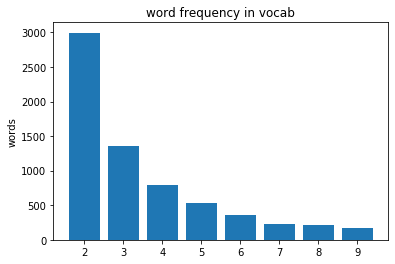

In [11]:
import matplotlib.pyplot as plt

# get , set data type for columns in a dataframe # ??
# d1 = pd.DataFrame(columns=[ 'float_column' ], dtype=float) # set type
print(X['vocab'].dtypes)
a = [X[X['vocab']==i].shape[0] for i in range(2,10)]
plt.bar(range(2,10),a)
plt.ylabel('words')
plt.title('word frequency in vocab')
plt.show()

we set the vocabulary to those words with a count of at least 2

In [13]:
X[X['vocab']>=2].shape[0]

7827

In [15]:
Y=X[X['vocab']>=2]
Y.columns
Y[['word','vocab']].sort_values(by=['vocab'], ascending=False) 
# check that we have only words with frequency at least 2

,word,vocab
535,mehr,433.0
283,schon,228.0
4647,daten,223.0
57,foto,205.0
187,sei,180.0
315,gibt,164.0
302,menschen,163.0
134,wurde,154.0
1451,sagt,151.0
47,sagte,140.0


In [18]:
vocab = Y[['word','vocab']]
# type(vocab) # still a data frame

In [19]:
# vocab.index
Y=X.loc[[i for i in set(vocab.index)]].fillna(0)

# do the clustering KMeans

In [20]:
Z=Y.drop(columns=['word','vocab']).transpose()
Y.shape , Z.shape

((7827, 156), (154, 7827))

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++', n_clusters=50, n_init=10)
kmeans.fit(Z)
P=kmeans.predict(Z)
Z['cluster']=P

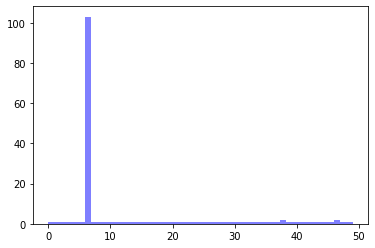

In [22]:
num_bins = 50
n, bins, patches = plt.hist(P, num_bins, facecolor='blue', alpha=0.5)
plt.show()

This is a poor result. We have basically 2 clusters and the rest are lonely points.
We should try different settings for the size of the vocab and the number of clusters.

However, this shoud get better when we add more data / articles. Or have data / atricles from different sources / newspapers. Only when there are multople articles covering the same topic then there is something meaningful to cluser.

Also, stemming might help. 

# HPO

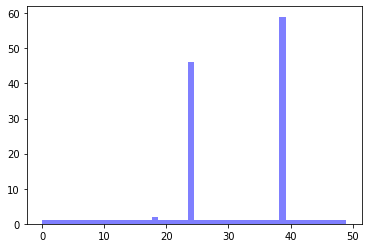

In [23]:
#from sklearn.cluster import KMeans
K = 50
min_wc = 3 # the lower bound for words in the vocabulary
Y=X[X['vocab']>= min_wc]
vocab = Y[['word','vocab']]
Y=X.loc[[i for i in set(vocab.index)]].fillna(0)
Z=Y.drop(columns=['word','vocab']).transpose()
Y.shape , Z.shape

kmeans = KMeans(init='k-means++', n_clusters= K, n_init=10)
kmeans.fit(Z)

P=kmeans.predict(Z)
Z['cluster']=P

num_bins = K
n, bins, patches = plt.hist(P, num_bins, facecolor='blue', alpha=0.5)
plt.show()

results: 
(K, min_wc) = (20,2) : cluster sizes : (140, 10, rest below 3)
effect gone at (20,3)

(K,min_wc) = (50,3) : cluster sizes :(67, 35, rest below 3) (guesses)

In [ ]:
## this was to learn about pandas data frames, from last semester's Biesmann class

In [226]:
fruits= pd.Series([0,2,2], index=['oranges','bananas','lemons'])
fruits.index.name = 'fruit'
more_fruits= pd.Series([1,0,1,5], index=['lemons','oranges','apples','bananas'])
more_fruits.index.name='fruit'
fruits+more_fruits

fruit
apples     NaN
bananas    7.0
lemons     3.0
oranges    0.0
dtype: float64

In [233]:
df3 = fruits.to_frame().reset_index()
df3.columns=['word','count a']
df4 = more_fruits.to_frame().reset_index()
df4.columns=['word','count b']
pd.merge(df3,df4, on="word", how="outer")

,word,count a,count b
0,oranges,0.0,0
1,bananas,2.0,5
2,lemons,2.0,1
3,apples,NaN,1


In [250]:
edf = pd.DataFrame(columns=['word', 'count'])
#edf = pd.DataFrame(index='word', columns=['count'])
#edf = edf.fillna(0)
pd.merge(df3,edf,on='word',how='outer')



,word,count a,count
0,oranges,0,NaN
1,bananas,2,NaN
2,lemons,2,NaN



about looping through a directory

In [ ]:
#file_name='tagesspiegel-2020-07-07/00001.txt'
#print(os.getcwd())
#(_, _, filenames) = next(os.walk("tagesspiegel-2020-07-07"))
#(_, _, filenames) = next(os.walk(os.getcwd()))
# print(filenames==".txt") # not ok
#go_through_file_names='tagesspiegel-2020-07-07/'